## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [2]:
from sklearn import datasets,metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Random Forest Regressor

In [21]:
# Load Datasets
df = datasets.load_boston()

# Splite the data down for the following processes
train_x,test_x,train_y,test_y = train_test_split(df.data , df.target , test_size = 0.2 , random_state = 3)

# Setup the model
clr = RandomForestRegressor(n_estimators=10 , max_depth=3)
clr.fit(train_x,train_y)

# Prediction
pred_y = clr.predict(test_x)

# MSE
metrics.mean_squared_error(test_y,pred_y)

13.069079691629863

In [22]:
import pandas as pd 

params = pd.DataFrame(data=clr.feature_importances_ , index=df.feature_names , columns=['coefficient'])
params

,coefficient
CRIM,0.012050
ZN,0.000000
INDUS,0.001276
CHAS,0.000000
NOX,0.016805
RM,0.454630
AGE,0.016759
DIS,0.084366
RAD,0.003818
TAX,0.001894


### Parameters adjustment

Text(0.5, 0, 'number of trees')

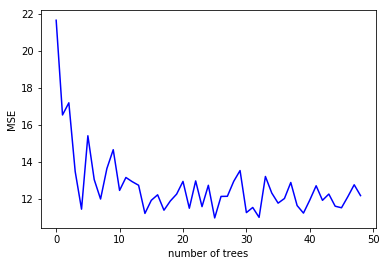

In [35]:
import numpy as np
import matplotlib.pyplot as plt
mse = []
for n in np.arange(1,50):
    clr = RandomForestRegressor(n_estimators=n , max_depth=3)
    clr.fit(train_x,train_y)
    m = metrics.mean_squared_error(test_y,clr.predict(test_x))
    mse.append(m)
plt.plot(mse , color='b')
plt.ylabel('MSE')
plt.xlabel('number of trees')

Text(0.5, 0, 'number of max_depth')

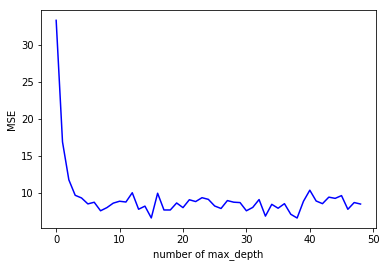

In [34]:
mse = []
for n in np.arange(1,50):
    clr = RandomForestRegressor(n_estimators=10 , max_depth=n)
    clr.fit(train_x,train_y)
    m = metrics.mean_squared_error(test_y,clr.predict(test_x))
    mse.append(m)
plt.plot(mse , color='b')
plt.ylabel('MSE')
plt.xlabel('number of max_depth')

### Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dtr = DecisionTreeRegressor()
dtr.fit(train_x,train_y)
pred_y = dtr.predict(test_x)
metrics.mean_squared_error(test_y,pred_y)

14.601078431372546

In [24]:
params = pd.DataFrame(data=dtr.feature_importances_ , index=df.feature_names , columns=['coefficient'])
params

,coefficient
CRIM,0.023651
ZN,0.000138
INDUS,0.006760
CHAS,0.001056
NOX,0.030244
RM,0.242995
AGE,0.013995
DIS,0.089840
RAD,0.003546
TAX,0.010028


In [45]:
k = ['auto','sqrt' ,'log2',None]
mse = []
for i in k:
    a = []
    for j in np.arange(90):
        clr = RandomForestRegressor(n_estimators=10 , max_depth=3 , max_features=i)
        clr.fit(train_x,train_y)
        m = metrics.mean_squared_error(test_y,clr.predict(test_x))
        a.append(m)
    mse.append(np.mean(a))

In [46]:
mse

[12.54205311459854, 19.728911406083594, 20.230610903179542, 12.608568582197963]